### <span style = "color:orange">1. Introduction<span>

#### <span style="color:green">1.1. Project purpose</span>

Xây dựng và đánh giá tập hợp các mô hình dự báo chuỗi thời gian để dự đoán nhiệt độ cực đại hàng ngày tại các khu vực đô thị và ven biển Việt Nam. Dự án áp dụng cả thuật toán Machine Learning truyền thống và Deep Learning hiện đại nhằm cải thiện độ chính xác dự báo so với các phương pháp thống kê thông thường.

<b>Nguồn dữ liệu</b>: Bộ dữ liệu ERA5 (ECMWF) với các bản ghi nhiệt độ từ 1990 đến 2024, được xử lý và biến đổi để huấn luyện các mô hình như Random Forest, XGBoost, LSTM, Transformer, TFT, và N-BEATS.

<b>Kết quả</b>: Đánh giá hiệu năng giữa các mô hình qua nhiều kịch bản thực nghiệm và đề xuất hệ thống cảnh báo nhiệt độ sớm ứng dụng thực tế.

#### <span style="color:green">1.2. Data source and description</span>

<h4>Thông tin dữ liệu trong đề tài:</h4>

<ul>
<li><b>Thời gian thu thập:</b> từ năm <b>1990 đến 2024</b></li>
<li><b>Định dạng ban đầu:</b> .grib, sau đó chuyển đổi sang .csv để xử lý</li>
</ul>

<h4>Các biến số chính trong tập dữ liệu:</h4>

<table>
<thead>
<tr>
<th>Tên cột dữ liệu</th>
<th>Ý nghĩa</th>
<th>Đơn vị đo</th>
</tr>
</thead>
<tbody>
<tr><td><code>NAME</code></td><td>Tên tỉnh/thành phố nơi thu thập dữ liệu</td><td>-</td></tr>
<tr><td><code>LATITUDE</code></td><td>Vĩ độ địa lý của điểm đo</td><td>Độ</td></tr>
<tr><td><code>LONGITUDE</code></td><td>Kinh độ địa lý của điểm đo</td><td>Độ</td></tr>
<tr><td><code>YMD</code></td><td>Ngày/tháng/năm đo đạc</td><td>dd/mm/yyyy</td></tr>
<tr><td><code>YEAR</code></td><td>Năm đo đạc</td><td>Năm</td></tr>
<tr><td><code>MONTH</code></td><td>Tháng đo đạc</td><td>Tháng</td></tr>
<tr><td><code>DAY</code></td><td>Ngày đo đạc</td><td>Ngày</td></tr>
<tr><td><code>TEMP_max</code></td><td>Nhiệt độ không khí cực đại trong ngày</td><td>°C</td></tr>
<tr><td><code>TEMP_ave</code></td><td>Nhiệt độ trung bình trong ngày</td><td>°C</td></tr>
<tr><td><code>DEW_ave</code></td><td>Điểm sương trung bình trong ngày</td><td>°C</td></tr>
<tr><td><code>DEW_max</code></td><td>Điểm sương cao nhất trong ngày</td><td>°C</td></tr>
<tr><td><code>RH_ave</code></td><td>Độ ẩm tương đối trung bình trong ngày</td><td>%</td></tr>
<tr><td><code>RH_max</code></td><td>Độ ẩm tương đối cực đại trong ngày</td><td>%</td></tr>
<tr><td><code>AT_ave</code></td><td>Nhiệt độ cảm nhận trung bình trong ngày (Apparent Temp.)</td><td>°C</td></tr>
<tr><td><code>AT_max</code></td><td>Nhiệt độ cảm nhận cao nhất trong ngày</td><td>°C</td></tr>
</tbody>
</table>

<p><b>Biến mục tiêu chính:</b></p>
<ul>
<li><code>TEMP_max</code> — Nhiệt độ không khí cực đại hàng ngày (°C)</li>
</ul>

<p><b>Lưu ý:</b> Dữ liệu gốc của ERA5 có thể chứa giá trị thiếu, giá trị ngoại lai và một số dị bản khí tượng đặc thù. Do đó, quá trình làm sạch dữ liệu, xử lý giá trị thiếu, phát hiện ngoại lệ và chuẩn hóa dữ liệu là các bước bắt buộc trước khi tiến hành huấn luyện và dự báo.</p>

In [2]:
match_type = {
    'NAME'       : 'Categorical',        # Tên tỉnh/thành phố (chuỗi)
    'LATITUDE'   : 'Numerical',          # Vĩ độ (°)
    'LONGITUDE'  : 'Numerical',          # Kinh độ (°)
    'YMD'        : 'Datetime',           # Ngày/tháng/năm (dd/mm/yyyy)
    'YEAR'       : 'Numerical',          # Năm (năm)
    'MONTH'      : 'Numerical',          # Tháng (1-12)
    'DAY'        : 'Numerical',          # Ngày (1-31)

    'TEMP_max'   : 'Numerical',          # Nhiệt độ cực đại trong ngày (°C)
    'TEMP_ave'   : 'Numerical',          # Nhiệt độ trung bình trong ngày (°C)
    'DEW_ave'    : 'Numerical',          # Điểm sương trung bình trong ngày (°C)
    'DEW_max'    : 'Numerical',          # Điểm sương cực đại trong ngày (°C)
    'RH_ave'     : 'Numerical',          # Độ ẩm tương đối trung bình trong ngày (%)
    'RH_max'     : 'Numerical',          # Độ ẩm tương đối cực đại trong ngày (%)
    'AT_ave'     : 'Numerical',          # Nhiệt độ cảm nhận trung bình trong ngày (°C)
    'AT_max'     : 'Numerical'           # Nhiệt độ cảm nhận cực đại trong ngày (°C)
}

#### <span style="color:green">1.3. Goals</span>

<img src="../../image/Ảnh chụp màn hình 2025-06-24 210616.png">

### <span style="color:orange">2. Import Libraries</span>

#### <span style="color:green">2.1. Configuration and display settings</span>

In [3]:
import sys
sys.path.append("../../")  # đường dẫn đến thư mục chứa src

from src.utilities import(config, 
                          dataset, 
                          features, 
                          plots)

from src.models import(anomaly_models,
                       forecasting_models,
                       model_utils)

#### <span style="color:green">2.2. Required Python packages</span>

In [4]:
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns
import os

from copy import deepcopy

from sklearn.preprocessing import OneHotEncoder  # Encode feature
from sklearn.preprocessing import OrdinalEncoder # Encode feature
from sklearn.preprocessing import MinMaxScaler   # Scale feature
from sklearn.preprocessing import StandardScaler # Scale feature
from sklearn.preprocessing import LabelEncoder   # Encode target
# from scipy.stats import boxcox # Normalized feature

# from sklearn.feature_selection import mutual_info_classif # PCA
from sklearn.model_selection   import train_test_split
from sklearn.model_selection   import RepeatedKFold
from sklearn.model_selection   import GridSearchCV
from sklearn.model_selection   import validation_curve
from sklearn.model_selection   import learning_curve


from sklearn.ensemble     import RandomForestRegressor
from xgboost              import XGBRegressor

# %pip install tensorflow
from tensorflow                 import keras
from tensorflow.keras           import layers
from tensorflow.keras.callbacks import EarlyStopping
import joblib

# Classification
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import matthews_corrcoef
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import roc_auc_score
# from sklearn.metrics import roc_curve
# from sklearn.metrics import classification_report

# Regression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error
# from sklearn.metrics import median_absolute_error
# from sklearn.metrics import max_error
# from sklearn.metrics import PredictionErrorDisplay

from sklearn.inspection import permutation_importance

### <span style="color:orange">3. Data Loading</span>

In [5]:
src = dict({"CaMau" : "../../data/processed/datasets/CaMau90.24_cleaned.csv",
            "DH"    : "../../data/processed/datasets/DH90.24_cleaned.csv",
            "NB"    : "../../data/processed/datasets/NB90.24_cleaned.csv",
            "QN"    : "../../data/processed/datasets/QN90.24_cleaned.csv",
            "TH"    : "../../data/processed/datasets/TH90.24_cleaned.csv",
            "TSN"   : "../../data/processed/datasets/TSN90.24_cleaned.csv"})

#### <span style="color:green">3.1. Loading the dataset</span>

In [6]:
station_name = "CaMau"

In [7]:
df = pd.read_csv(filepath_or_buffer = src[station_name],
                 parse_dates        = True,
                 index_col          = "time")

#### <span style="color:green">3.2. Displaying first few rows</span>

In [8]:
df.head()

,latitude,longitude,ymd,year,month,day,number,step,surface,sp,tcc,tp,u10,v10,wind_speed,wind_direction_deg
time,,,,,,,,,,,,,,,,
1990-01-01 00:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,0.000022,-0.372383,0.391136,0.540052,136.407024
1990-01-01 01:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,0.000022,-0.372383,0.391136,0.540052,136.407024
1990-01-01 02:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,0.000022,-0.372383,0.391136,0.540052,136.407024
1990-01-01 03:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,0.000022,-0.372383,0.391136,0.540052,136.407024
1990-01-01 04:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,0.000022,-0.372383,0.391136,0.540052,136.407024


In [9]:
df.tail()

,latitude,longitude,ymd,year,month,day,number,step,surface,sp,tcc,tp,u10,v10,wind_speed,wind_direction_deg
time,,,,,,,,,,,,,,,,
2025-01-01 09:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.44,1.0,2.671077e-07,0.135825,-2.628218,2.631725,357.041615
2025-01-01 10:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.44,1.0,2.671077e-07,0.135825,-2.628218,2.631725,357.041615
2025-01-01 11:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.44,1.0,2.671077e-07,0.135825,-2.628218,2.631725,357.041615
2025-01-01 12:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.44,1.0,2.671077e-07,0.135825,-2.628218,2.631725,357.041615
2025-01-01 13:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.44,1.0,2.671077e-07,0.135825,-2.628218,2.631725,357.041615


#### <span style="color:green">3.3. Data summary</span>

In [10]:
df.shape

(306830, 16)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 306830 entries, 1990-01-01 00:00:00+07:00 to 2025-01-01 13:00:00+07:00
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   latitude            306830 non-null  float64
 1   longitude           306830 non-null  float64
 2   ymd                 306830 non-null  object 
 3   year                306830 non-null  int64  
 4   month               306830 non-null  int64  
 5   day                 306830 non-null  int64  
 6   number              306830 non-null  float64
 7   step                306830 non-null  object 
 8   surface             306830 non-null  float64
 9   sp                  306830 non-null  float64
 10  tcc                 306830 non-null  float64
 11  tp                  306830 non-null  float64
 12  u10                 306830 non-null  float64
 13  v10                 306830 non-null  float64
 14  wind_speed          306830 non-null  f

In [12]:
df.describe()

,latitude,longitude,year,month,day,number,surface,sp,tcc,tp,u10,v10,wind_speed,wind_direction_deg
count,3.068300e+05,3.068300e+05,306830.000000,306830.000000,306830.000000,306830.0,306830.0,306830.000000,306830.000000,3.068300e+05,306830.000000,306830.000000,306830.000000,306830.000000
mean,9.180000e+00,1.051500e+02,2007.001525,6.522589,15.729225,0.0,0.0,100975.049994,0.750857,2.089330e-04,-0.274956,0.284848,2.841550,163.679003
std,5.329079e-15,7.105439e-14,10.100220,3.448856,8.800578,0.0,0.0,216.909463,0.301445,4.282642e-04,2.893074,1.253492,1.422471,87.440629
min,9.180000e+00,1.051500e+02,1990.000000,1.000000,1.000000,0.0,0.0,100216.440000,0.000000,0.000000e+00,-9.223403,-3.804276,0.004248,0.006132
25%,9.180000e+00,1.051500e+02,1998.000000,4.000000,8.000000,0.0,0.0,100824.500000,0.548593,3.243262e-07,-2.492012,-0.483519,1.721899,86.261094
50%,9.180000e+00,1.051500e+02,2007.000000,7.000000,16.000000,0.0,0.0,100962.625000,0.909145,2.150216e-05,-0.372383,0.391136,2.648886,147.896792
75%,9.180000e+00,1.051500e+02,2016.000000,10.000000,23.000000,0.0,0.0,101113.940000,0.990941,1.759430e-04,1.987964,1.149865,3.804855,246.692280
max,9.180000e+00,1.051500e+02,2025.000000,12.000000,31.000000,0.0,0.0,101710.560000,1.000000,2.578854e-03,8.654032,4.565799,9.350749,359.996272


### <span style="color:orange">4. Data Preparation</span>

In [13]:
df.columns

Index(['latitude', 'longitude', 'ymd', 'year', 'month', 'day', 'number',
       'step', 'surface', 'sp', 'tcc', 'tp', 'u10', 'v10', 'wind_speed',
       'wind_direction_deg'],
      dtype='object')

#### <span style="color:green">4.1. Feature Selection</span>

##### <span style="color:tomato">Train/Validation/Test</span>

Theo thứ tự thời gian (không shuffle)

In [14]:
features = df[['sp', 'tcc', 'tp', 'u10', 'v10', 'wind_speed']]
targets  = df['wind_direction_deg']

In [15]:
# Aproach1
# le = LabelEncoder()
# targets_encoded = le.fit_transform(targets)


# # Aproach2
# targets_encoded = targets_encoded.replace({'e': 0, 'p': 1})

# # Aproach3
targets_encoded = targets.replace({'e': 0, 'p': 1})

In [16]:
# # y_train
targets

time
1990-01-01 00:00:00+07:00    136.407024
1990-01-01 01:00:00+07:00    136.407024
1990-01-01 02:00:00+07:00    136.407024
1990-01-01 03:00:00+07:00    136.407024
1990-01-01 04:00:00+07:00    136.407024
                                ...    
2025-01-01 09:00:00+07:00    357.041615
2025-01-01 10:00:00+07:00    357.041615
2025-01-01 11:00:00+07:00    357.041615
2025-01-01 12:00:00+07:00    357.041615
2025-01-01 13:00:00+07:00    357.041615
Name: wind_direction_deg, Length: 306830, dtype: float64

In [17]:
targets_encoded

time
1990-01-01 00:00:00+07:00    136.407024
1990-01-01 01:00:00+07:00    136.407024
1990-01-01 02:00:00+07:00    136.407024
1990-01-01 03:00:00+07:00    136.407024
1990-01-01 04:00:00+07:00    136.407024
                                ...    
2025-01-01 09:00:00+07:00    357.041615
2025-01-01 10:00:00+07:00    357.041615
2025-01-01 11:00:00+07:00    357.041615
2025-01-01 12:00:00+07:00    357.041615
2025-01-01 13:00:00+07:00    357.041615
Name: wind_direction_deg, Length: 306830, dtype: float64

#### <span style="color:green">4.2. Dimensionality Reducing</span>

##### <span style="color:tomato">PCA</span>

In [18]:
mi_scores = plots.make_mi_scores_regression(
    X_data = features, 
    y_data = targets
)

print(mi_scores.head(20))
# print(mi_scores.head(20))
# print(mi_scores.tail(20))  # uncomment to see bottom 20

v10           1.318882
u10           1.194451
wind_speed    0.156810
sp            0.148118
tp            0.092708
tcc           0.083556
Name: MI Scores, dtype: float64


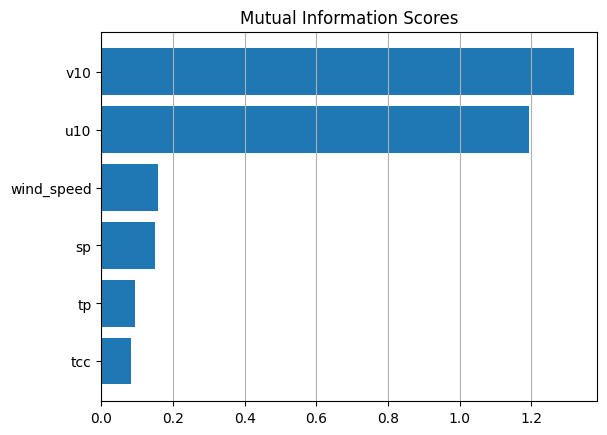

In [19]:
plots.plot_mi_scores(mi_scores)
# script.plot_mi_scores(mi_scores.head(62))
# script.plot_mi_scores(mi_scores.tail(38))  # uncomment to see bottom 20

In [20]:
# # # Lấy số lượng cột cần giữ lại (17 số cột có điểm MI cao nhất)
# num_columns_to_keep = 17

# # Lấy danh sách các cột cần giữ lại
# columns_to_keep = mi_scores.nlargest(num_columns_to_keep).index

# # Cập nhật X_train_encoded và X_test_encoded chỉ với các cột được giữ lại
# features = features[columns_to_keep]

# # Hiển thị các cột còn lại
# print(f"Các cột được giữ lại:\n{features.columns}")

#### <span style="color:green">4.3. Feature Engineering</span>

In [21]:
features.dtypes

sp            float64
tcc           float64
tp            float64
u10           float64
v10           float64
wind_speed    float64
dtype: object

In [22]:
categorical_features = features.select_dtypes(exclude='number').columns
categorical_features

Index([], dtype='object')

In [23]:
numerical_features = features.select_dtypes(include='number').columns
numerical_features

Index(['sp', 'tcc', 'tp', 'u10', 'v10', 'wind_speed'], dtype='object')

##### <span style="color:tomato">Encode categorical feature</span>

In [24]:
categorical_features

Index([], dtype='object')

In [25]:
features[categorical_features]

""
time
1990-01-01 00:00:00+07:00
1990-01-01 01:00:00+07:00
1990-01-01 02:00:00+07:00
1990-01-01 03:00:00+07:00
1990-01-01 04:00:00+07:00
...
2025-01-01 09:00:00+07:00
2025-01-01 10:00:00+07:00
2025-01-01 11:00:00+07:00


In [26]:
categories = [match_type[col] for col in categorical_features]
# encoder = OrdinalEncoder(
#     categories = categories,
#     handle_unknown = 'use_encoded_value', 
#     unknown_value  = -1
# )
encoder = OneHotEncoder(categories     = categories,
                        sparse_output  = False,
                        handle_unknown = "ignore")

features_encoded  = deepcopy(features)

# # Encode
# features_cat_encoded  = encoder.fit_transform(features[categorical_features])

# Kiểm tra số cột
# print("Số cột của dữ liệu đã mã hóa: ", features_cat_encoded.shape[1])

# Loại bỏ các cột trong `categorical` khỏi features_encoded
features_encoded  = features_encoded.drop(columns=categorical_features)

# Thêm các cột đã mã hóa vào features_encoded
# encoded_columns = encoder.get_feature_names_out(categorical_features)

# Tạo DataFrame từ các cột đã mã hóa và gán lại tên cột
# features_encoded  = pd.DataFrame(features_cat_encoded, columns=encoded_columns, index=features.index)

# Kết hợp lại với các cột còn lại trong features_encoded
# features_encoded  = pd.concat([features_encoded, features.drop(columns=categorical_features)], axis=1)
features_encoded  = features

In [27]:
features_encoded

,sp,tcc,tp,u10,v10,wind_speed
time,,,,,,
1990-01-01 00:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 01:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 02:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 03:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 04:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
...,...,...,...,...,...,...
2025-01-01 09:00:00+07:00,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725
2025-01-01 10:00:00+07:00,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725
2025-01-01 11:00:00+07:00,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725


#### <span style="color:green">4.4. Feature Scaling</span>

In [28]:
features_encoded[numerical_features]

,sp,tcc,tp,u10,v10,wind_speed
time,,,,,,
1990-01-01 00:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 01:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 02:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 03:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 04:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
...,...,...,...,...,...,...
2025-01-01 09:00:00+07:00,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725
2025-01-01 10:00:00+07:00,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725
2025-01-01 11:00:00+07:00,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725


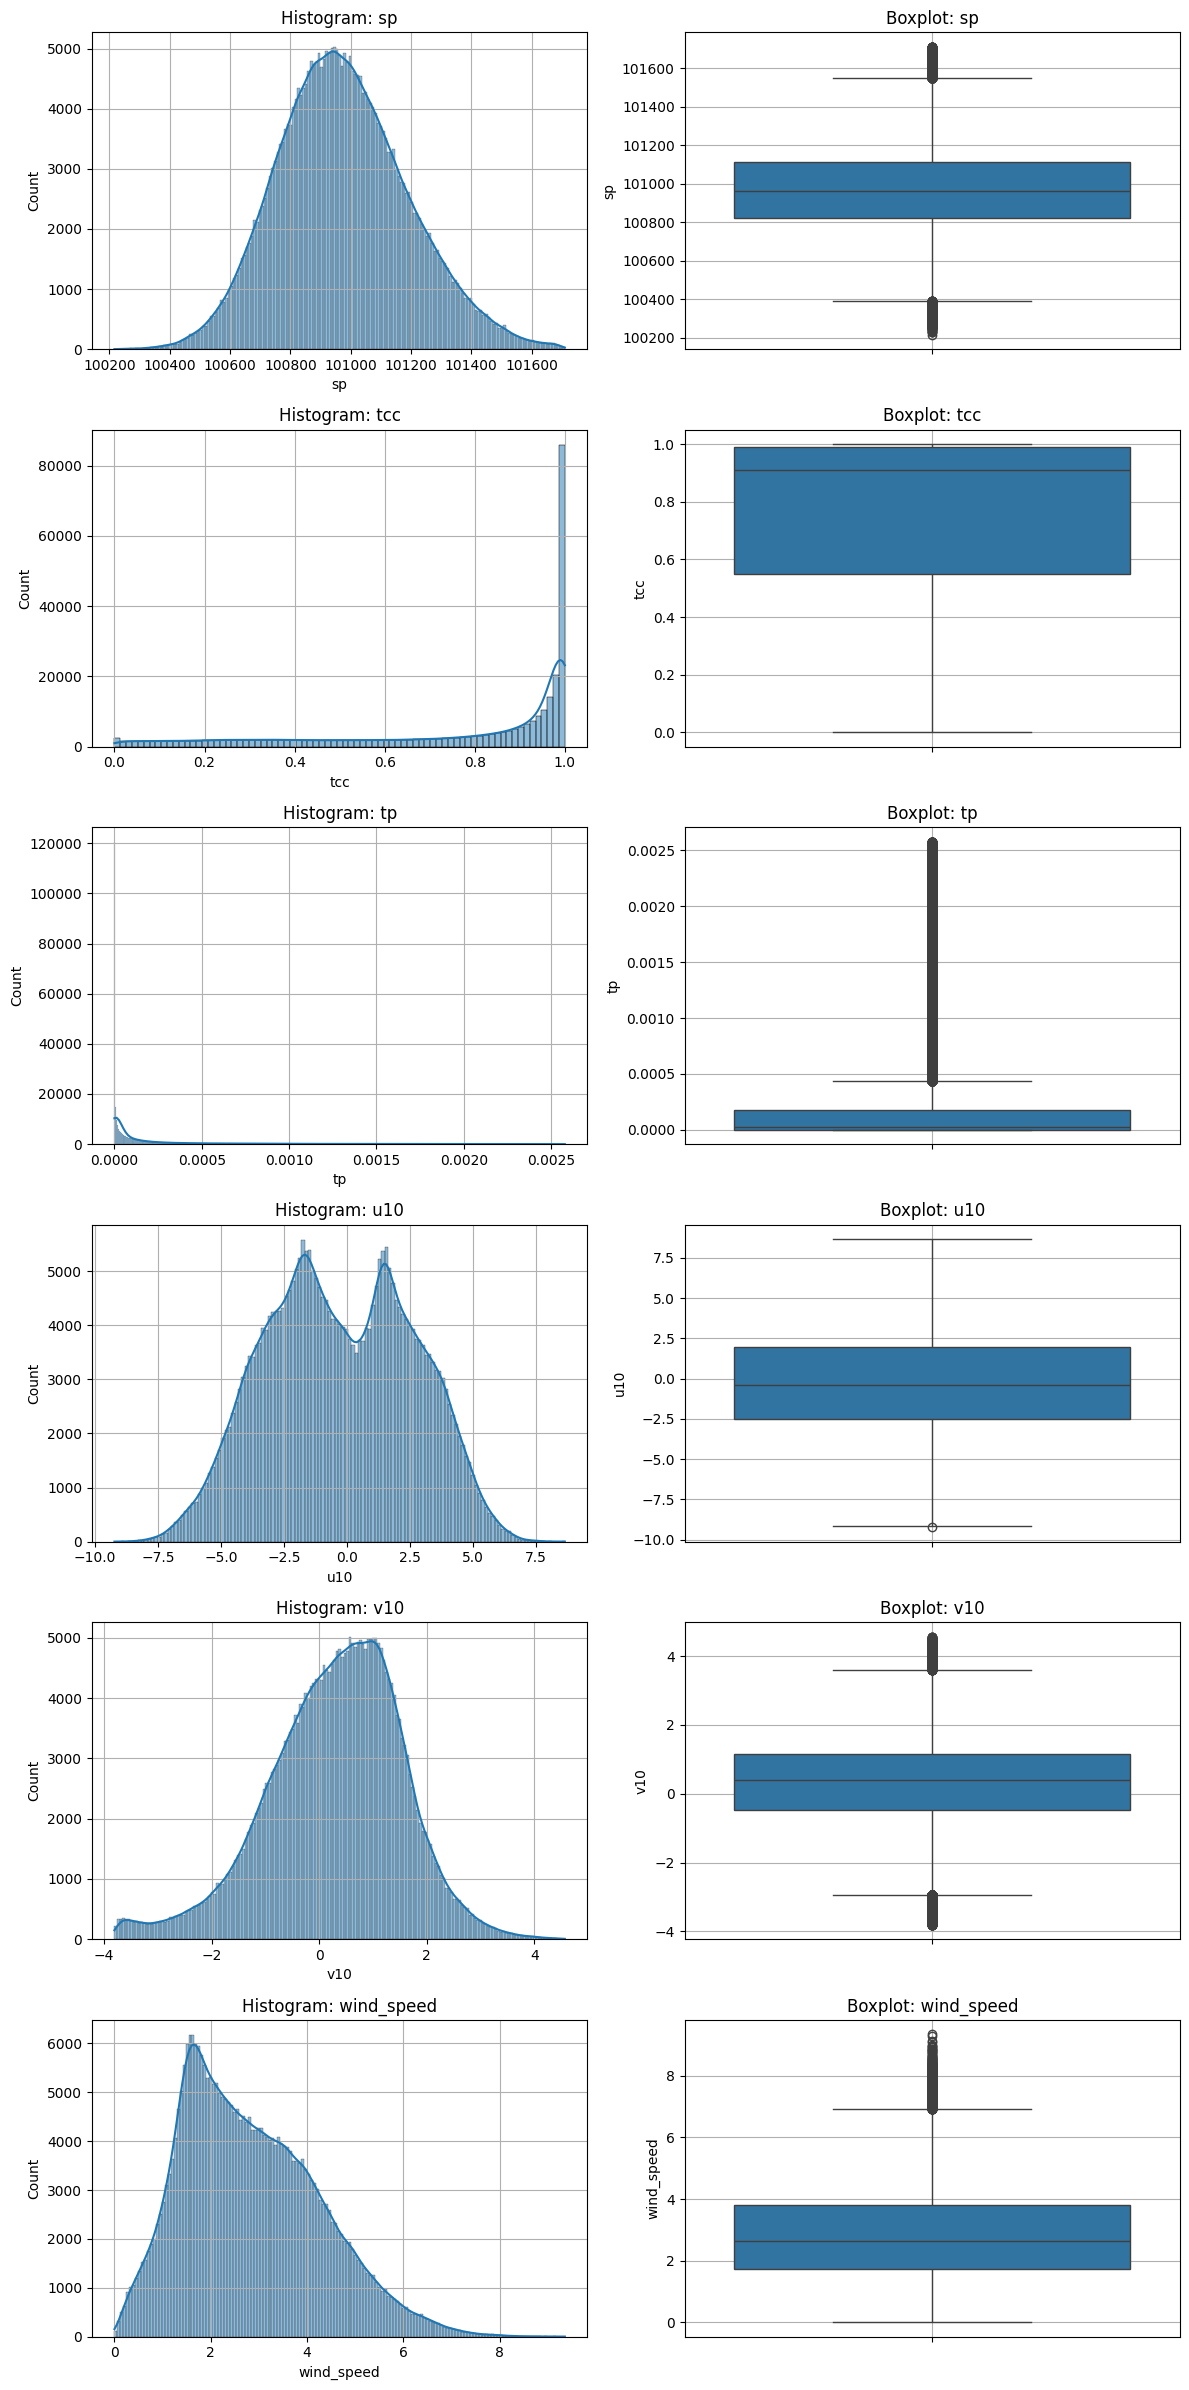

In [29]:
# Classification
# sns.histplot(
#     data = features_encoded[numerical_features],
#     kde  = True,
# )

# Regression
# for col in numerical_features:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(
#         data = features_encoded[col],
#         kde  = True,
#         # bins = 50
#     )
#     plt.title(f'Distribution of {col}')
#     plt.grid(True)
#     plt.show()

plots.plot_Outlier(data      = features_encoded,
                   data_cols = numerical_features)

In [30]:
# Scale
# scaler = StandardScaler()
# scaler = MinMaxScaler()

# features_scale = scaler.fit_transform(features_encoded[s])

# features_encoded[numerical_features] = features_scale

In [31]:
features_encoded[numerical_features]

,sp,tcc,tp,u10,v10,wind_speed
time,,,,,,
1990-01-01 00:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 01:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 02:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 03:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 04:00:00+07:00,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
...,...,...,...,...,...,...
2025-01-01 09:00:00+07:00,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725
2025-01-01 10:00:00+07:00,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725
2025-01-01 11:00:00+07:00,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725


In [32]:
# Classification
# sns.histplot(
#     data = features_encoded[numerical_features],
#     kde  = True,
# )

# Regression
# for col in numerical_features:
#     plt.figure(figsize=(8, 4))
#     sns.histplot(
#         data = features_encoded[col],
#         kde  = True,
#         # bins = 50
#     )
#     plt.title(f'Distribution of {col}')
#     plt.grid(True)
#     plt.show()

# plots.plot_Outlier(data      = features_encoded,
#                    data_cols = numerical_features)

#### <span style="color:green">4.5. Save data</span>

In [33]:
# Check so dong
print(features_encoded.shape)
print(targets_encoded.shape)

(306830, 6)
(306830,)


In [34]:
# Reset index
df_reset         = df.reset_index()
features_encoded = features_encoded.reset_index(drop=True)
targets_df       = pd.DataFrame(targets_encoded, columns=["wind_direction_deg"]).reset_index(drop=True)

# Thay thế giá trị ở các cột trùng trong df_reset bằng features_encoded
df_reset[features_encoded.columns] = features_encoded[features_encoded.columns]

# Tương tự 
df_reset[targets_df.columns] = targets_df[targets_df.columns]

# Lưu file
os.makedirs("../../data/processed/datasets_encoded/", exist_ok=True)
file_name = f"../../data/processed/datasets_encoded/{station_name}90.24_encoded.csv"
df_reset.to_csv(file_name, index=False)
print(f"✅ Đã lưu: {file_name}")

✅ Đã lưu: ../../data/processed/datasets_encoded/CaMau90.24_encoded.csv


In [ ]:
# # Bảo đảm chỉ so sánh trên các cột chung
# common_cols = df.columns.intersection(df_reset.columns)

# # Reset index để so sánh từng dòng
# df1 = df[common_cols].reset_index(drop=True)
# df2 = df_reset[common_cols].reset_index(drop=True)

# # Lưu vị trí các thay đổi
# changes = []

# for row in range(len(df1)):
#     for col in common_cols:
#         val_a = df1.at[row, col]
#         val_b = df2.at[row, col]
#         if pd.isna(val_a) and pd.isna(val_b):
#             continue
#         if val_a != val_b:
#             changes.append({
#                 "row": row,
#                 "column": col,
#                 "old_value": val_a,
#                 "new_value": val_b
#             })

# # Chuyển sang DataFrame dễ đọc
# df_changes = pd.DataFrame(changes)

# print("🟡 Các giá trị đã bị thay đổi từ df ➝ df_reset:")
# df_changes

🟡 Các giá trị đã bị thay đổi từ df ➝ df_reset:


""


### <span style="color:orange">5.Model</span>

In [37]:
src_encoded = dict({"CaMau" : "../../data/processed/datasets_encoded/CaMau90.24_encoded.csv",
                    "NB"    : "../../data/processed/datasets_encoded/NB90.24_encoded.csv",
                    "QN"    : "../../data/processed/datasets_encoded/QN90.24_encoded.csv",
                    "TSN"   : "../../data/processed/datasets_encoded/TSN90.24_encoded.csv"})

In [38]:
df               = pd.read_csv(filepath_or_buffer = src_encoded[station_name],
                               parse_dates        = True,
                               index_col          = "time")
targets_encoded  = df["wind_direction_deg"]
features_encoded = df.drop(columns = ["wind_direction_deg"])

In [39]:
features_encoded

,latitude,longitude,ymd,year,month,day,number,step,surface,sp,tcc,tp,u10,v10,wind_speed
time,,,,,,,,,,,,,,,
1990-01-01 00:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 01:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 02:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 03:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
1990-01-01 04:00:00+07:00,9.18,105.15,1/1/1990,1990,1,1,0.0,0 days,0.0,100962.625,0.909145,2.150216e-05,-0.372383,0.391136,0.540052
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-01 09:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725
2025-01-01 10:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725
2025-01-01 11:00:00+07:00,9.18,105.15,1/1/2025,2025,1,1,0.0,0 days,0.0,100997.440,1.000000,2.671077e-07,0.135825,-2.628218,2.631725


In [40]:
targets_encoded

time
1990-01-01 00:00:00+07:00    136.407024
1990-01-01 01:00:00+07:00    136.407024
1990-01-01 02:00:00+07:00    136.407024
1990-01-01 03:00:00+07:00    136.407024
1990-01-01 04:00:00+07:00    136.407024
                                ...    
2025-01-01 09:00:00+07:00    357.041615
2025-01-01 10:00:00+07:00    357.041615
2025-01-01 11:00:00+07:00    357.041615
2025-01-01 12:00:00+07:00    357.041615
2025-01-01 13:00:00+07:00    357.041615
Name: wind_direction_deg, Length: 306830, dtype: float64

#### <span style="color:green">5.1. Building models</span>

##### <span style="color:tomato">Building Models ~ aproach1</span>

In [41]:
reg_model = RandomForestRegressor(bootstrap                = True, 
                                  ccp_alpha                = 0.0, 
                                  criterion                = 'squared_error', 
                                  max_depth                = None, 
                                  max_features             = 1.0,
                                  max_leaf_nodes           = None,
                                  max_samples              = None, 
                                  min_impurity_decrease    = 0.0, 
                                  min_samples_leaf         = 1, 
                                  min_samples_split        = 2, 
                                  min_weight_fraction_leaf = 0.0, 
                                  monotonic_cst            = None, 
                                  n_estimators             = 100, 
                                  n_jobs                   = None, 
                                  oob_score                = False, 
                                  random_state             = None, 
                                  verbose                  = 1,               # Parameter nay dung de hien thi tien trinh train model, 1 = On; 0 = Off
                                  warm_start               = False)

##### <span style="color:tomato">Building Models ~ aproach2</span>

Validation Curve

In [ ]:
# param_grid = {
#     "n_estimators"      : [100, 300, 500],        # nhiều cây giúp giảm phương sai
#     "max_depth"         : [10, 20, 30, 50, None], # để kiểm tra độ sâu và tránh overfitting
#     "min_samples_split" : [2, 5, 10],             # số mẫu tối thiểu để split node
#     "min_samples_leaf"  : [1, 2, 4, 8],           # mẫu tối thiểu tại mỗi lá
#     # "max_features"      : ["sqrt", "log2"],       # vẫn giữ để dùng GridSearchCV, nhưng Validation Curve thì bỏ qua
#     "bootstrap"         : [True, False],          # kiểm tra dùng bagging hay không
#     "max_samples"       : [0.5, 0.75, 1.0]        # (mới từ sklearn 0.22) — kiểm tra nếu bootstrap=True thì lấy bao nhiêu % dữ liệu
# }


# train_model.plot_VC(
#     X_data     = features_encoded,
#     Y_data     = targets_encoded,
#     model      = RandomForestRegressor(),
#     param_grid = param_grid,
#     ylim       = [0.01,1.20],
#     n_jobs     = 4 # Quan trong: value o day quyet dinh se su dung bao nhieu processor de chay ~> cang cao cang tot
# ) # 0.9689 ~ 0.002335721469090121 ~ np.logspace(-10, 10, 20)

In [ ]:
# reg_model = RandomForestRegressor(
#     n_estimators       = ,
#     max_depth          = ,
#     min_samples_split  = ,
#     min_samples_leaf   = ,
#     max_features       = ,
#     bootstrap          = 
# ) 

In [42]:
# Lưu model
joblib.dump(reg_model, '../../models/trained_models/RF_model.pkl')

['../../models/trained_models/RF_model.pkl']

##### <span style="color:tomato">Building Models ~ aproach3</span>

In [ ]:
# param_grid = {
#     # "alpha": np.logspace(-3, 1, 20),         # Multinomial, Bernoulli
#     "var_smoothing": np.logspace(-9, -5, 10) # Gaussian
# }

# reg_model = script.FindBestTuningModel(
#     model      = GaussianNB(),
#     param_grid = param_grid,
#     train_X    = features_encoded,
#     train_y    = targets_encoded
# )

##### <span style="color:tomato">Building Models ~ aproach4</span>

#### <span style="color:green">5.2. Training models</span>

In [43]:
X_train_encoded = features_encoded[(features_encoded["year"] >= 1990) & (features_encoded["year"] < 2022)]
X_test_encoded  = features_encoded[(features_encoded["year"] >= 2022) & (features_encoded["year"] <= 2024)]

y_train_encoded = targets_encoded[(features_encoded["year"] >= 1990) & (features_encoded["year"] < 2022)].reset_index(drop=True)
y_test_encoded  = targets_encoded[(features_encoded["year"] >= 2022) & (features_encoded["year"] <= 2024)].reset_index(drop=True)

In [44]:
X_train_encoded.columns

Index(['latitude', 'longitude', 'ymd', 'year', 'month', 'day', 'number',
       'step', 'surface', 'sp', 'tcc', 'tp', 'u10', 'v10', 'wind_speed'],
      dtype='object')

In [45]:
y_train_encoded

0         136.407024
1         136.407024
2         136.407024
3         136.407024
4         136.407024
             ...    
280507     75.615781
280508     72.817550
280509     72.791138
280510     74.409287
280511     70.672041
Name: wind_direction_deg, Length: 280512, dtype: float64

In [46]:
features.columns

Index(['sp', 'tcc', 'tp', 'u10', 'v10', 'wind_speed'], dtype='object')

##### <span style="color:tomato">Training Models ~ aproach1</span>

In [47]:
# X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(features_encoded, targets_encoded, test_size = 0.2, random_state=40024090)
# best_nb_model.fit(X_train_encoded, y_train_encoded)
# y_pred = best_nb_model.predict(X_test_encoded)

reg_model.fit(X_train_encoded[features.columns], y_train_encoded)

y_fit  = pd.DataFrame(data    = reg_model.predict(X_train_encoded[features.columns]), 
                      index   = y_train_encoded.index, 
                      columns = ['wind_direction_deg'])
y_pred = pd.DataFrame(data    = reg_model.predict(X_test_encoded[features.columns]), 
                      index   = y_test_encoded.index, 
                      columns = ['wind_direction_deg'])

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:  2.3min
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  5.1min finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    7.3s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   14.2s finished
[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.6s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    1.3s finished


##### <span style="color:tomato">Training Models ~ aproach2</span>

Learning Curve

In [ ]:
# script.plot_LC(
#     X_data       = features_encoded,
#     Y_data       = targets_encoded,
#     model        = reg_model,
#     train_sizes  = np.linspace(0.2, 1, 20),
#     random_state = 40020409,
#     n_jobs       = 4 # Quan trong: value o day quyet dinh se su dung bao nhieu processor de chay ~> cang cao cang tot
# ) # 0.9693 ~ 0.4968 ~ np.linspace(0.2, 1, 20)

In [ ]:
# X_train_encoded, X_test_encoded, y_train_encoded, y_test_encoded = train_test_split(
#     features_encoded, targets_encoded, 
#     train_size   = 0.4968,
#     random_state = 40020409
# )
# reg_model.fit(X_train_encoded, y_train_encoded)
# y_pred = reg_model.predict(X_test_encoded)

#### <span style="color:green">5.3. Save models</span>

In [48]:
# Lưu model
joblib.dump(reg_model, '../../models/trained_models/RF_trained.pkl')

['../../models/trained_models/RF_trained.pkl']

### <span style="color:orange">6.Model Evaluation</span>

#### <span style="color:green">6.1. Load model</span>

In [49]:
# Load lại model
reg_model = joblib.load('../../models/trained_models/RF_trained.pkl')

#### <span style="color:green">6.2. Evaluation Metrics</span>

##### <span style="color:tomato">r2_score</span>

In [50]:
r2_score(y_true      = y_train_encoded,
         y_pred      = y_fit,
         multioutput = "uniform_average")

0.9999929392934229

##### <span style="color:tomato">mean_absolute_error</span>

In [51]:
mean_absolute_error(y_true      = y_train_encoded,
                    y_pred      = y_fit)

0.028921458362112504

##### <span style="color:tomato">mean_squared_error</span>

In [52]:
mean_squared_error(y_true      = y_train_encoded,
                   y_pred      = y_fit,
                   multioutput = "uniform_average")

0.05372744949518033

##### <span style="color:tomato">mean_squared_log_error</span>

In [53]:
mean_squared_log_error(y_true      = y_train_encoded,
                       y_pred      = y_fit,
                       multioutput = "uniform_average")

0.00014787698056161305

##### <span style="color:tomato">mean_absolute_percentage_error</span>

In [54]:
mean_absolute_percentage_error(y_true      = y_train_encoded,
                               y_pred      = y_fit,
                               multioutput = "uniform_average")

0.037168481933353856

#### <span style="color:green">6.3. Visualizing Evaluation results</span>

##### <span style="color:tomato">Training Deviance</span>

##### <span style="color:tomato">Feature Importance</span>

<a href="http://127.0.0.1:55658/scikit-learn-1_5/auto_examples/ensemble/plot_gradient_boosting_regression.html">Gradient Boosting regression</a>

In [ ]:
# def plot_feature_importance(model, X_train, X_test, y_test, n_repeats=10, scoring=None):
#     import matplotlib.pyplot as plt
#     import numpy as np
#     from sklearn.inspection import permutation_importance
#     from packaging.version import parse as parse_version
#     import matplotlib

#     if hasattr(model, "estimators_"):  # MultiOutput
#         estimators = model.estimators_
#     else:
#         estimators = [model]

#     for i, estimator in enumerate(estimators):
#         fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#         # MDI Importance (tree attribute)
#         if hasattr(estimator, "feature_importances_"):
#             mdi_importances = estimator.feature_importances_
#             feature_names = X_train.columns
#             assert len(mdi_importances) == len(feature_names), f"Số feature không khớp ở estimator {i}"
#             sorted_idx = np.argsort(mdi_importances)
#             pos = np.arange(len(feature_names)) + 0.5

#             axes[0].barh(pos, mdi_importances[sorted_idx], align="center")
#             axes[0].set_yticks(pos)
#             axes[0].set_yticklabels(np.array(feature_names)[sorted_idx])
#             axes[0].set_title(f"Feature Importance (MDI) - Target {i}")
#         else:
#             axes[0].text(0.5, 0.5, 'Model không hỗ trợ MDI importance', ha='center')
#             axes[0].axis('off')

#         # Permutation Importance (test set)
#         result = permutation_importance(
#             estimator, X_test, y_test.iloc[:, i] if y_test.ndim == 2 else y_test,
#             n_repeats=n_repeats, random_state=42, n_jobs=-1, scoring=scoring
#         )

#         sorted_idx_perm = result.importances_mean.argsort()
#         tick_labels_parameter_name = (
#             "tick_labels"
#             if parse_version(matplotlib.__version__) >= parse_version("3.9")
#             else "labels"
#         )
#         tick_labels_dict = {
#             tick_labels_parameter_name: np.array(X_train.columns)[sorted_idx_perm]
#         }

#         axes[1].boxplot(result.importances[sorted_idx_perm].T, vert=False, **tick_labels_dict)
#         axes[1].set_title(f"Permutation Importance (test set) - Target {i}")

#         fig.tight_layout()
#         plt.grid(True)
#         plt.show()
        
# plot_feature_importance(
#     model         = reg_model,
#     X_train       = X_train_encoded[features.columns],
#     X_test        = X_test_encoded[features.columns],
#     y_test        = y_test_encoded,
#     n_repeats     = 10,
#     scoring       = None
# )

##### <span style="color:tomato">Confusion matrix</span>

A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-

True Positives (TP) – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.

True Negatives (TN) – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.

False Positives (FP) – False Positives occur when we predict an observation belongs to a certain class but the observation actually does not belong to that class. This type of error is called Type I error.

False Negatives (FN) – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called Type II error.

In [ ]:
# plots.plot_CF_aproach1(y_test_encoded, y_pred)

In [ ]:
# script.plot_CF_aproach2(y_test_encoded, y_pred)

##### <span style="color:tomato">Classification metrices</span>

Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. I have described these terms in later.

In [ ]:
# print(classification_report(y_test_encoded, y_pred))

##### <span style="color:tomato">Class probabilities</span>

In [ ]:
# y_pred1 = best_nb_model.predict_proba(X_test_encoded)[:, 1]

# # Vẽ histogram + kde
# sns_hist = sns.histplot(
#     y_pred1, 
#     bins=10, 
#     kde=True, 
#     edgecolor='black', 
#     alpha=0.7
# )

# # Lấy các thông tin cần từ histogram
# counts, edges = np.histogram(y_pred1, bins=10)
# total = len(y_pred1)

# # Thêm số phần trăm lên từng cột
# for i in range(len(counts)):
#     bin_center = (edges[i] + edges[i+1]) / 2
#     height = counts[i]
#     plt.text(bin_center, height + height*0.01, 
#              f'{(counts[i]/total*100):.1f}%', 
#              ha='center', fontsize=9)

# plt.title('Histogram of predicted probabilities with KDE')
# plt.xlim(0, 1)
# plt.xlabel('Predicted probability (class=1)')
# plt.ylabel('Frequency')
# plt.grid(True, axis='y')
# plt.show()

#### <span style="color:green">6.4. Interpretation of performance</span>

In [ ]:
# # # Logistic Regression
# # lr_param_grid = {
# #     'C': np.logspace(-4, 4, 10),    # regularization strength
# #     'solver': ['lbfgs', 'liblinear']
# # }
# # best_lr_model = script.FindBestModel(
# #     LogisticRegression(max_iter=1000),
# #     lr_param_grid,
# #     X_train_encoded, y_train_encoded
# # )

# # # Decision Tree
# # dt_param_grid = {
# #     'max_depth': [3, 5, 7, 10, None],
# #     'min_samples_split': [2, 5, 10],
# #     'criterion': ['gini', 'entropy']
# # }
# # best_dt_model = script.FindBestModel(
# #     DecisionTreeClassifier(random_state=42),
# #     dt_param_grid,
# #     X_train_encoded, y_train_encoded
# # )

# # # Random Forest
# # rf_param_grid = {
# #     'n_estimators': [100, 300, 500],
# #     'max_features': ['sqrt', 'log2', 5],
# #     'max_depth': [None, 5, 10],
# #     'min_samples_split': [2, 5, 10]
# # }
# # best_rf_model = script.FindBestModel(
# #     RandomForestClassifier(random_state=42),
# #     rf_param_grid,
# #     X_train_encoded, y_train_encoded
# # )

# # KNN
# # knn_param_grid = {
# #     'n_neighbors': [3, 5, 7, 9, 11],
# #     'weights': ['uniform', 'distance'],
# #     'metric': ['euclidean', 'manhattan', 'minkowski']
# # }
# # best_knn_model = script.FindBestTuningModel(
# #     KNeighborsClassifier(),
# #     knn_param_grid,
# #     X_train_encoded, y_train_encoded
# # )

# # # SVM
# # svm_param_grid = {
# #     'C': np.logspace(-3, 3, 7),
# #     'kernel': ['linear', 'rbf'],
# #     'gamma': ['scale', 'auto']
# # }
# # best_svm_model = script.FindBestModel(
# #     SVC(probability=True, random_state=42),
# #     svm_param_grid,
# #     X_train_encoded, y_train_encoded
# # )

# # # XGBoost
# # xgb_param_grid = {
# #     'n_estimators': [100, 300, 500],
# #     'max_depth': [3, 5, 7],
# #     'learning_rate': [0.01, 0.1, 0.2],
# #     'subsample': [0.6, 0.8, 1.0],
# #     'colsample_bytree': [0.6, 0.8, 1.0]
# # }
# # best_xgb_model = script.FindBestModel(
# #     XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
# #     xgb_param_grid,
# #     X_train_encoded, y_train_encoded
# # )




# # Logistic Regression
# best_lr_model = LogisticRegression(C=1.0, solver='lbfgs', max_iter=1000)
# best_lr_model.fit(X_train_encoded, y_train_encoded)

# # Decision Tree
# best_dt_model = DecisionTreeClassifier(max_depth=5, min_samples_split=2, criterion='gini', random_state=42)
# best_dt_model.fit(X_train_encoded, y_train_encoded)

# # Random Forest
# best_rf_model = RandomForestClassifier(n_estimators=100, max_features='sqrt', max_depth=5, min_samples_split=2, random_state=42)
# best_rf_model.fit(X_train_encoded, y_train_encoded)

# # KNN
# # best_knn_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
# # best_knn_model.fit(X_train_encoded, y_train_encoded)

# # # SVM
# # best_svm_model = SVC(C=1.0, kernel='rbf', gamma='scale', probability=True, random_state=42)
# # best_svm_model.fit(X_train_encoded, y_train_encoded)

# # # XGBoost
# # best_xgb_model = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=0.1, subsample=0.8, colsample_bytree=0.8, use_label_encoder=False, eval_metric='logloss', random_state=42)
# # best_xgb_model.fit(X_train_encoded, y_train_encoded)

In [ ]:
# print('Logistic Regression : Training set score = {:.4f}'.format(best_lr_model.score(X_train_encoded, y_train_encoded)))
# print('                      Test set score     = {:.4f}'.format(best_lr_model.score(X_test_encoded, y_test_encoded)))

# print('Decision Tree        : Training set score = {:.4f}'.format(best_dt_model.score(X_train_encoded, y_train_encoded)))
# print('                      Test set score     = {:.4f}'.format(best_dt_model.score(X_test_encoded, y_test_encoded)))

# print('Random Forest        : Training set score = {:.4f}'.format(best_rf_model.score(X_train_encoded, y_train_encoded)))
# print('                      Test set score     = {:.4f}'.format(best_rf_model.score(X_test_encoded, y_test_encoded)))

# # print('K-Nearest Neighbors  : Training set score = {:.4f}'.format(best_knn_model.score(X_train_encoded, y_train_encoded)))
# # print('                      Test set score     = {:.4f}'.format(best_knn_model.score(X_test_encoded, y_test_encoded)))

# # print('Support Vector Machine : Training set score = {:.4f}'.format(best_svm_model.score(X_train_encoded, y_train_encoded)))
# # print('                        Test set score     = {:.4f}'.format(best_svm_model.score(X_test_encoded, y_test_encoded)))

# # print('XGBoost               : Training set score = {:.4f}'.format(best_xgb_model.score(X_train_encoded, y_train_encoded)))
# # print('                        Test set score     = {:.4f}'.format(best_xgb_model.score(X_test_encoded, y_test_encoded)))

In [ ]:
# lr_probs  = best_lr_model.predict_proba(X_test_encoded)[:, 1]
# dt_probs  = best_dt_model.predict_proba(X_test_encoded)[:, 1]
# rf_probs  = best_rf_model.predict_proba(X_test_encoded)[:, 1]
# # knn_probs = best_knn_model.predict_proba(X_test_encoded)[:, 1]
# # svm_probs = best_svm_model.predict_proba(X_test_encoded)[:, 1]
# # xgb_probs = best_xgb_model.predict_proba(X_test_encoded)[:, 1]

# y_pred1 = best_nb_model.predict_proba(X_test_encoded)[:, 1]

# nb_auc = roc_auc_score(y_test_encoded, y_pred1)
# lr_auc = roc_auc_score(y_test_encoded, lr_probs)
# dt_auc  = roc_auc_score(y_test_encoded, dt_probs)
# rf_auc = roc_auc_score(y_test_encoded, rf_probs)
# # knn_auc = roc_auc_score(y_test_encoded, knn_probs)
# # svm_auc = roc_auc_score(y_test_encoded, svm_probs)
# # xgb_auc = roc_auc_score(y_test_encoded, xgb_probs)
# print(f'Naive Bayes         : AUROC = {nb_auc:.3f}')
# print(f'Logistic Regression : AUROC = {lr_auc:.3f}')
# print(f'Decision Tree       : AUROC = {dt_auc:.3f}')
# print(f'Random Forest       : AUROC = {rf_auc:.3f}')
# # print(f'K-Nearest Neighbors : AUROC = {knn_auc:.3f}')
# # print(f'SVM                 : AUROC = {svm_auc:.3f}')
# # print(f'XGBoost             : AUROC = {xgb_auc:.3f}')

In [ ]:
# nb_fpr, nb_tpr, _ = roc_curve(y_test_encoded, y_pred1)
# lr_fpr, lr_tpr, _ = roc_curve(y_test_encoded, lr_probs)
# fpr_dt, tpr_dt, _ = roc_curve(y_test_encoded, dt_probs)
# rf_fpr, rf_tpr, _ = roc_curve(y_test_encoded, rf_probs)
# # fpr_knn, tpr_knn, _ = roc_curve(y_test_encoded, knn_probs)
# # fpr_svm, tpr_svm, _ = roc_curve(y_test_encoded, svm_probs)
# # fpr_xgb, tpr_xgb, _ = roc_curve(y_test_encoded, xgb_probs)


# plt.figure(figsize=(12, 8))
# plt.plot(nb_fpr, nb_tpr,   label='Naive Bayes        (AUC = %0.4f)' % nb_auc)
# plt.plot(lr_fpr, lr_tpr,   label='LogisticRegression (AUC = %0.4f)' % lr_auc)
# plt.plot(fpr_dt, tpr_dt,   label=f'Decision Tree     (AUC={dt_auc:.4f})')
# plt.plot(rf_fpr, rf_tpr,   label=f'Random Forest     (AUC = %0.4f)' % rf_auc)
# # plt.plot(fpr_knn, tpr_knn, label=f'KNN               (AUC={knn_auc:.4f})')
# # plt.plot(fpr_svm, tpr_svm, label=f'SVM               (AUC={svm_auc:.4f})')
# # plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost           (AUC={xgb_auc:.4f})')
# plt.plot([0, 1], [0, 1],   label='Random Guess       (AUC=0.500)')

# plt.title('ROC Curve Comparison')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.grid(True)
# plt.legend()  
# plt.show()

In [ ]:
# y_pred1 = best_rf_model.predict_proba(X_test_encoded)[:, 1]

# # Vẽ histogram + kde
# sns_hist = sns.histplot(
#     y_pred1, 
#     bins=10, 
#     kde=True, 
#     edgecolor='black', 
#     alpha=0.7
# )

# # Lấy các thông tin cần từ histogram
# counts, edges = np.histogram(y_pred1, bins=10)
# total = len(y_pred1)

# # Thêm số phần trăm lên từng cột
# for i in range(len(counts)):
#     bin_center = (edges[i] + edges[i+1]) / 2
#     height = counts[i]
#     plt.text(bin_center, height + height*0.01, 
#              f'{(counts[i]/total*100):.1f}%', 
#              ha='center', fontsize=9)

# plt.title('Histogram of predicted probabilities with KDE')
# plt.xlim(0, 1)
# plt.xlabel('Predicted probability (class=1)')
# plt.ylabel('Frequency')
# plt.grid(True, axis='y')
# plt.show()

### <span style="color:orange">7. Conclusion</span>

In [ ]:
# # Deepcopy test_df cho tập validation
# X_val_encoded = deepcopy(test_df)

# # Sắp xếp đúng thứ tự cột gốc trước khi encode (có thể không cần nếu test_df đã đúng thứ tự)
# X_val_encoded = X_val_encoded[columns_to_keep]

# # Encode tập validation
# X_val_cat_encoded = encoder.transform(X_val_encoded[categorical_feature])

# # Tạo DataFrame mới từ cột mã hóa
# encoded_columns = encoder.get_feature_names_out(categorical_feature)
# X_val_cat_encoded_df = pd.DataFrame(X_val_cat_encoded, columns=encoded_columns, index=X_val_encoded.index)

# # Loại bỏ cột categorical khỏi X_val_encoded
# X_val_encoded = X_val_encoded.drop(columns=categorical_feature)

# # Nối lại cột encode vào
# X_val_encoded = pd.concat([X_val_encoded, X_val_cat_encoded_df], axis=1)

# # Sắp xếp lại thứ tự cột theo đúng feature_encoded
# X_val_encoded = X_val_encoded[features_encoded.columns]

In [ ]:
# X_val_encoded.info()

In [ ]:
# # Ensure X_val_encoded contains only the columns used during training
# # X_val_encoded = X_val_encoded[columns_to_keep]

# # Predict the target variable
# y_val_predict = model.predict(X_val_encoded)

In [ ]:
# y_pred2 = best_nb_model.predict_proba(X_val_encoded)[:, 1]

# # Vẽ histogram + kde
# sns_hist = sns.histplot(
#     y_pred2, 
#     bins=10, 
#     kde=True, 
#     edgecolor='black', 
#     alpha=0.7
# )

# # Lấy các thông tin cần từ histogram
# counts, edges = np.histogram(y_pred2, bins=10)
# total = len(y_pred2)

# # Thêm số phần trăm lên từng cột
# for i in range(len(counts)):
#     bin_center = (edges[i] + edges[i+1]) / 2
#     height = counts[i]
#     plt.text(bin_center, height + height*0.01, 
#              f'{(counts[i]/total*100):.1f}%', 
#              ha='center', fontsize=9)

# plt.title('Histogram of predicted probabilities with KDE')
# plt.xlim(0, 1)
# plt.xlabel('Predicted probability (class=1)')
# plt.ylabel('Frequency')
# plt.grid(True, axis='y')
# plt.show()